![title](https://media1.britannica.com/eb-media/79/4679-004-8C0793EF.jpg)

## Table of contents
***
- [Titanic: Machine Learning from Disaster](#intro)
- [Kernel Goals](#aboutthiskernel)
- [Part 1: Importing Necessary Modules](#obtainingthedata)
    - [About This Dataset](#aboutthisdataset)
- [Part 2: Cleaning the Data](#scrubbingthedata)
    - [2a. Dealing with different variables](#dealwithvariables)
    - [2b. Dealing with Null values](#dealwithnullvalues)
- [Part 3: Exploratory Data Analysis](#eda)
    - [3a. Statistical Overview](#statisticaloverview)
    - [3b. Correlation Matrix and Heatmap](#heatmap)
    - [3c. Statistical Test for Correlation](#statistical_test)
    - [3d. Feature Relations](#feature_relations)
        - [3d1. Gender and Survived](#gender_surviver)
        - [3d2. Pclass and Survived](#pclass_surviver)
        - [3d3. Fare and Survived](#fare_surviver)
        - [3d4. Age and Survived](#age_surviver)
- [Modeling the Data](#modelingthedata)
- [Interpreting the Data](#interpretingthedata)

## Titanic: Machine Learning from Disaster
<a id="intro"></a>
***
The sinking of the **RMS Titanic** is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224** passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, **some groups of people were more likely to survive than others**, such as women, children, and the upper-class.

In this challenge, I will complete the analysis of what sorts of people were likely to survive. In particular, I will apply the tools of machine learning to predict which passengers survived the tragedy.

## Kernel Goals
<a id="aboutthiskernel"></a>
***
**Feel free to use this kernel as a template for your project or share it with anyone.**

This kernel goes into the heart of the Titanic disaster analysis, trying to harness as many insights as possible about the tragedy. Once found, those ideas will be visualized to ease the understanding process of the report. Visualization is an important step, and it goes back to the old saying, "a picture is worth a thousand words." The data visualization with quite self-explanatory, however, after each data visualization, there will be a short description the visualization.

There are two primary goals of this kernel.
- To do an exploratory data analysis of how some group of people was survived more than others through visualization.  
- And to create a machine learning models that can predict the chances of passengers survival.

*** This kernel is a work in progress like all of my other notebooks. I will always incorporate new concepts of data science as I master them. This journey of learning is worth sharing as well as collaborating. Therefore any comments about further improvements would be genuinely appreciated***

## Part 1: Importing Necessary Modules
***
<a id="obtainingthedata"></a>


In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
import pandas as pd
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV



## Ignore warning
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
## Importing the training dataset
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 1a. About This Dataset
<a id="aboutthisdataset"></a>
***
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set includes passengers survival status(also know as the ground truth from the titanic tragedy)  which along with other features like gender, class, fare and pclass is used to create machine learning model. 

The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.

Now let's go through the features and see what they stands for. 

**Variable    Definition    Key**
- Survival    
    - 0 = No
    - 1 = Yes
- pclass (Ticket class)    
    - 1 = 1st, 
*     - 2 = 2nd, 
    - 3 = 3rd
- sex
- Age
- sibsp (# of siblings / spouses aboard the Titanic)    
- parch    (# of parents / children aboard the Titanic)    
- ticket    
- fare
- cabin    
- embarked    Port of Embarkation    
    - C = Cherbourg, 
    - Q = Queenstown, 
    - S = Southampton

- pclass: A proxy for socio-economic status (SES)

** This is important to remember and will come in handy for later analysis**
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
    
    

## Part 2: Cleaning the Data
<a id="cleaningthedata"></a>
***

In [3]:
## Just to take a quick glance of what we are dealing with 
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to..

- **Deal with  different variables**
- ** Deal with Null values.**


### 2a. Dealing with different variables
<a id="dealwithvariables"></a>
***
There are four type of variables

- **Numerical Features:** Age, Fare, SibSp and Parch
- **Categorical Features: ** Sex, Embarked, Survived and Pclass
- **Alphanumeric Features:** Ticket and Cabin
- **Text Features:** Name
***
We are going to approach these features from different aspects and depending on the situation we might have to come back and tweak these features. I will explain later on as we work through it.


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## Setting passengerID as Index since it wont be necessary for the analysis
train = train.set_index("PassengerId")

## Dropped name and Cabin column since they will not be much of help with the analysis.
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S


In [7]:
## get dummy variables for Column sex and embarked since they are categorical value
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)

In [8]:
## Renaming the Sex_male column to Gender, since this will be quite important part of this notebook later on. 
train = train.rename(columns={"Sex_male": "Gender"})
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0


So, we did a couple of steps above, let's take a look..
***
- We choose **PassengerId** feature as our index since it will not aid us in any way in creating our model. 
- We got rid of **Name** and **Ticket** feature since these features also do not help us much. 
- We got rid of **Cabin** column since approximately 3/4 of the data consists of null value.
- We created dummy variables for **Sex** and **Embarked** since they are categorical variable.

### 2b. Dealing with Null values
<a id="dealwithnullvalues"></a>
***

In [9]:
# Check to see if there are any missing values, 
# It looks like the Cabin column will not be much of help for the dataset
train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Gender          0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [10]:
# importing KNN to help fill up the missing values for age column. 
from fancyimpute import KNN
age_filled_data = KNN(k=10).complete(train)

Using TensorFlow backend.


Imputing row 1/891 with 0 missing, elapsed time: 0.138
Imputing row 101/891 with 0 missing, elapsed time: 0.141
Imputing row 201/891 with 0 missing, elapsed time: 0.142
Imputing row 301/891 with 1 missing, elapsed time: 0.143
Imputing row 401/891 with 0 missing, elapsed time: 0.144
Imputing row 501/891 with 0 missing, elapsed time: 0.145
Imputing row 601/891 with 0 missing, elapsed time: 0.146
Imputing row 701/891 with 0 missing, elapsed time: 0.146
Imputing row 801/891 with 0 missing, elapsed time: 0.147


In [11]:
df = pd.DataFrame(age_filled_data, columns = train.columns)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0


There are different ways to deal with Null values. Some standard approaches are mean, median and mode. However, I recently learned to use pythons library **fancyimpute** where I can use the idea of **KNN** which is imputing nearest neighbor value instead of a Null value. And that is what I did above to replace the Null values in **Age** column.

## Part 3: Exploratory Data Analysis(EDA)
<a id="eda"></a>
***

![title](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)

### 3a. Statistical Overview
<a id="statisticaloverview"></a>
***

In [12]:
## This dataset contains 10 columns and 891 raws. 
df.shape

(891, 9)

In [13]:
# Looks like only 38% Passenger/crew have survived and 62% were not able to survive. 
df.Survived.value_counts()/len(df)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [14]:
## Lets take a look at the statistical overview. 
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.964353,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.722992,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.847145,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [15]:
# Overview(Survived vs non survied)
survived_summary = df.groupby("Survived")
survived_summary.mean()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
Survived,,,,,,,,
0.0,2.531876,31.072721,0.553734,0.329690,22.117887,0.852459,0.085610,0.777778
1.0,1.950292,28.185130,0.473684,0.464912,48.395408,0.318713,0.087719,0.634503


In [16]:
survived_summary = df.groupby("Gender")
survived_summary.mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Gender,,,,,,,,
0.0,0.742038,2.159236,27.519238,0.694268,0.649682,44.479818,0.114650,0.646497
1.0,0.188908,2.389948,31.294970,0.429809,0.235702,25.523893,0.071057,0.764298


There are a couple of points that should be noted from the statistical overview. They are..
- About this data set, it has 891 raw and 9 columns. 
- About the survival rate, **only 38% passenger survived during that tragedy. **
- About the survival rate for genders, **74% female passengers survived, while only 19% male passengers survived.**


### 3b. Correlation Matrix and Heatmap
<a id="heatmap"></a>
***

In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.102389,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.376435,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.102389,-0.376435,1.000000,-0.214757,-0.182113,0.102293,0.131514,-0.025351,-0.010465
SibSp,-0.035322,0.083081,-0.214757,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.182113,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.102293,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Gender,-0.543351,0.131900,0.131514,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.025351,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.010465,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


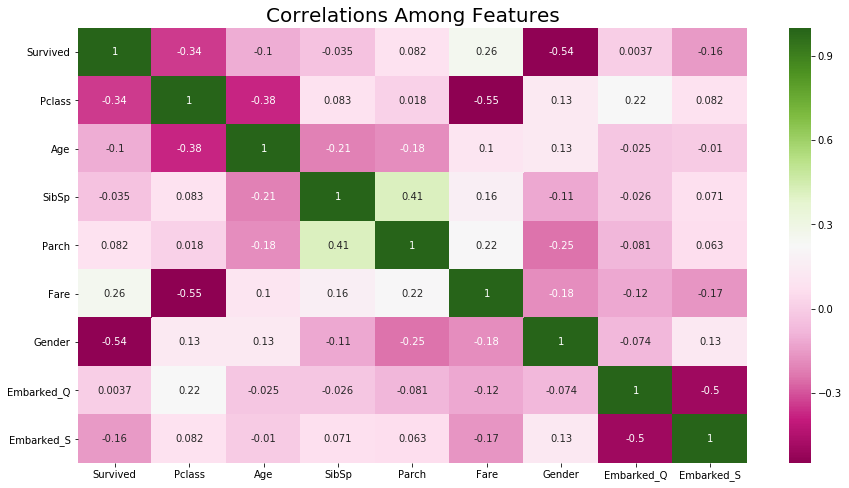

In [18]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,  cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

#### Positive Correlation Features:
- Fare and Survived: 0.26

#### Negative Correlation Features:
- Fare and Pclass: -0.55
- Gender and Survived: -0.54
- Pclass and Survived: -0.34


**So, Let's analyze these correlations a bit.** We have found some moderately strong correlations between different features. There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.55). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.34. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the biggest correlation with our dependent variable is the Gender variable, which basically is the info of whether the passenger was male or female. this is a negative correlation with a magnitude of -0.54 which definitely points towards some undeniable insights. Let's do some statistics to see how undeniable this insight is. 

### 3c. Statistical Test for Correlation
<a id="statistical_test"></a>
***
#### One-Sample T-Test(Measuring male-female ratio)
A one-sample t-test checks whether a sample mean differs from the population mean. Since *Gender* has the highest correlation with the dependent variable *Survived*, we can test to see if the mean *Gender* that survived differs from mean Gender that did not survive. 
***
**Note:** There are two types of outcome in the Gender variable, **"0"** and **"1"**, ***"0" being the gender as female and "1" being the gender as "male"***. Therefore, while determining average of Gender, we should keep in mind that, **an increase in the average gender means an increase in male passengers, similarly a decrease in the average gender mean a reduction in male passengers, therefore increase in female passengers and so on**
***

***Hypothesis Testing***: Is there a significant difference in the mean Gender between the passenger who survived and passenger who did not survive?

- ** Null Hypothesis(H0)** The null hypothesis would be that there is no difference in the mean Gender between the passenger who survived and passenger who did not survive. 
- ** Alternative Hypothesis(H1):** The alternative hypothesis would be that there is a difference in the mean Gender between the passenger who survived and those who did not.




In [19]:
## Lets compare the means of gender for passengers who survived and the passengers who didnot survive. 

avg_survived = df[df["Survived"]==1]["Gender"].mean()
print ("The average gender for the passengers who survived is: " + str(avg_survived))
avg_not_survived = df[df["Survived"]==0]["Gender"].mean()
print ("The average gender for the passengers who did not survive is: " + str(avg_not_survived))

The average gender for the passengers who survived is: 0.31871345029239767
The average gender for the passengers who did not survive is: 0.8524590163934426


#### The T-Test
***
Let's conduct a T-Test at **95% confidence level**. The T-Test statistics will tell us how much the sample of the survived passengers(in statistics languange this is the sample) alligns with the means of passenger(in statistics language this is population mean) who did not survive. if the test statistics(t-statistics) do not align(fall with in the critical value) 95% of the time, we reject the null hypothesis that **the sample comes from the same distribution as the passenger population**. In order to conduct a one sample t-test, we can use the **tats.ttest_1samp()** function. 

In [20]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Survived']==1]['Gender'], # Sample of passenger who survived. 
                  popmean = avg_not_survived)  # Mean of passenger who did not survive.

Ttest_1sampResult(statistic=-21.15175300093388, pvalue=4.9767809898873822e-64)

#### T-test Quantile
***
T-test Quantile helps us to find that critical value area. In other words it helps us to draw a border between rejection area and non rejection area. If the t-statistics value we have acquired above fall outside the quantile or non-rejection area then we reject the null hypothesis. We can find the quantiles with **stats.t.ppf()**

In [21]:
## Finding the t-test quantile. 
degree_freedom = len(df[df['Survived']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The left quartile range of t-distribution is: ' + str(LQ))
print ('The right quartile range of t-distribution is: ' + str(RQ))

The left quartile range of t-distribution is: -1.96692464548
The right quartile range of t-distribution is: 1.96692464548


#### T-Test Result

Our T-test result shows that the **t-statistics is -21.15**, while our left quantile range for t-distribution is -1.9669 and our right quantile range for t-distribution is 1.9669. 

#### One-Sample T-Test Summary
***
- **Our t-test score is T-Test = -21.1516** 
- **P-value = 4.97**
- **We reject the null hypothesis**

**We reject the null hypothesis because ..**
- The T-statistics is outside the quantiles(Non-rejection Region)
- The P-value is less than the alpha(.5) or confidence level of 95%. 

Based on the statistics from One sample t-test, we decided to **reject the null hypothesis**. We rejected the null hypothesis based on two core components. The first one is the T-statistics of -21.15, which is far away from the quantile of -1.966. In addition to that the P-value of 4.97 which is lower than the chosen alpna value(confidence level) of .05 or 5%.

Even though we have some statistics to conclude the null hypothesis but this does not mean that there is a practical significance in mean of gender between the passenger who survived and the passenger who did not survive. A more detailed conducted experiment with more data analysis and visualization can help us find more insights about this tragedy. 



### 3d. Feature Relations
<a id="feature_relations" ></a>
***
Before dive into finding relations between different features and our dependent variable(survivor) let us make some predictions about how we think the relations might turnout among features.  

**Predictions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 



#### 3d1. Gender and Survived

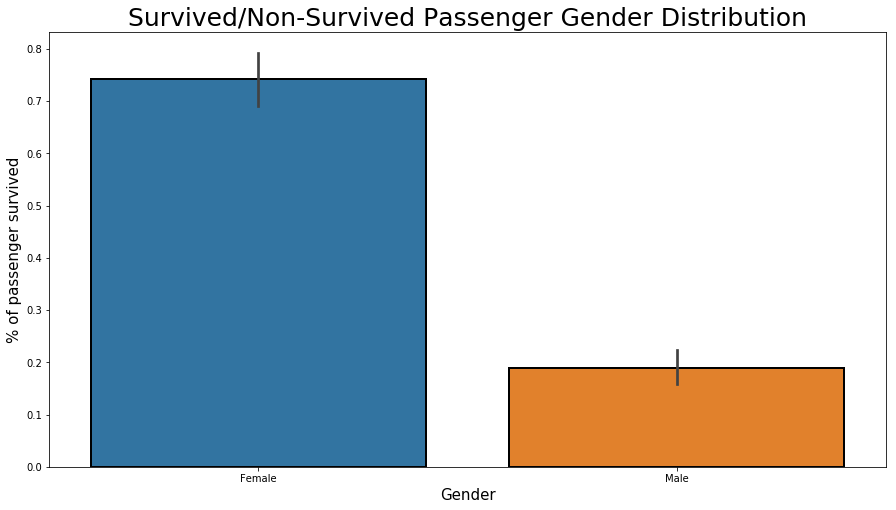

In [22]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Gender", y = "Survived", data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)

labels = ['Female', 'Male']
plt.xticks(sorted(df.Gender.unique()), labels);


This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

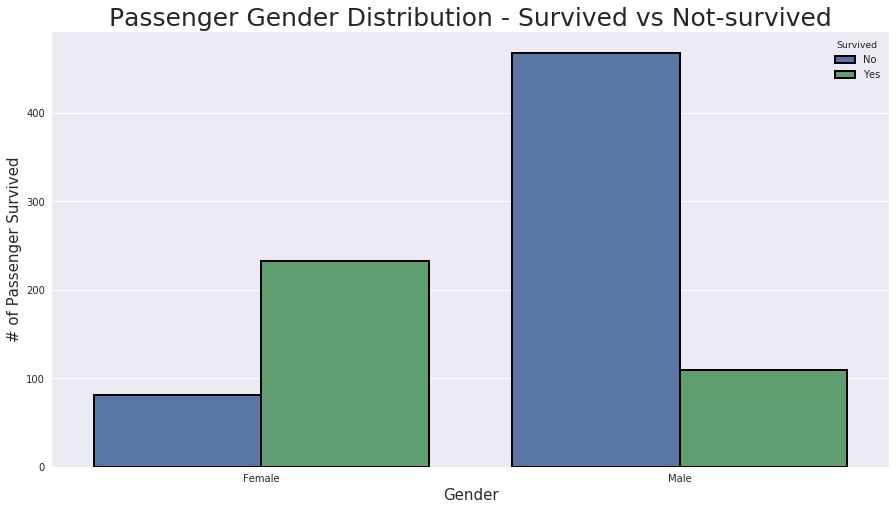

In [23]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Gender", 
                   hue="Survived",
                   data = df,
                   edgecolor=(0,0,0), 
                   linewidth=2)
## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
labels = ['Female', 'Male']
plt.xticks(sorted(df.Gender.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 

**Summary**
***
- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

#### 3d2. Pclass and Survived
<a id="pcalss_survivor"></a>
***

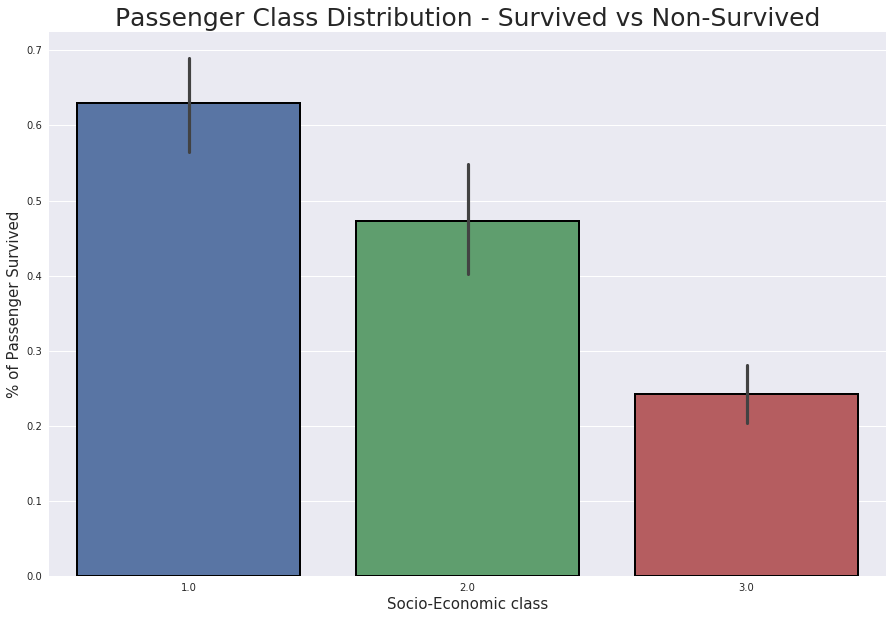

In [24]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", y = "Survived", data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived. 

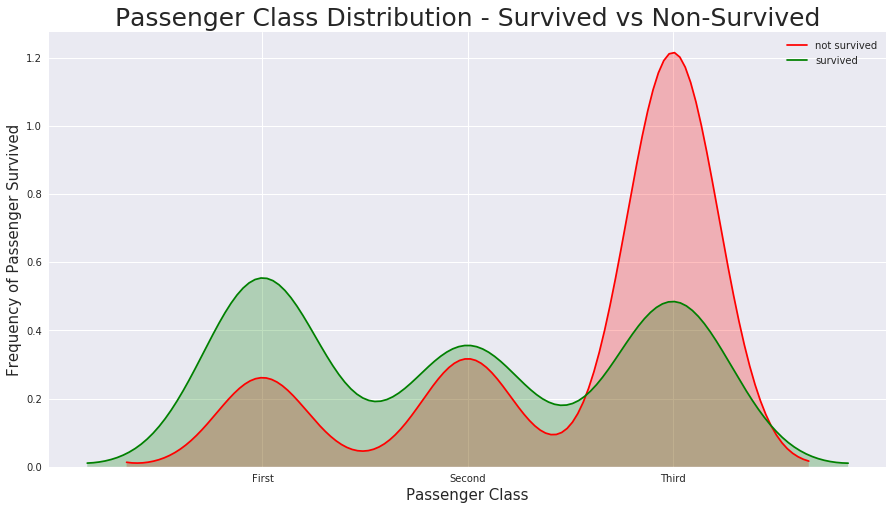

In [25]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'] , color='g',shade=True, label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)

## Converting xticks into words for better understanding
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()), labels);

This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second. 

**Summary**
***
First class passenger had the upper hand during the tragedy than second and third class passengers. You can probably agree with me more on this, when we look at the distribution of ticket fare and survived column. 

#### 3d3. Fare and Survived
<a id="fare_survivor"></a>
***

Text(0.5,0,'Fare')

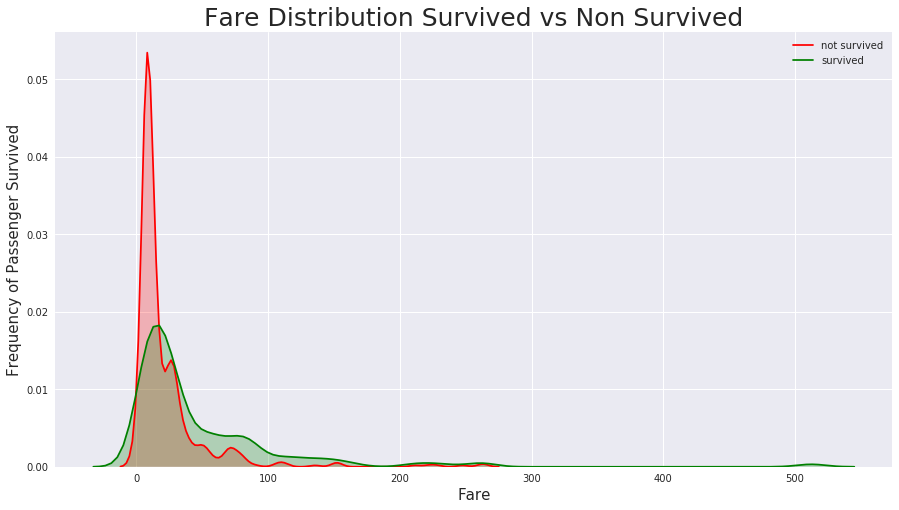

In [26]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

This plot shows somethig really interesting..
- When fare is approximately more than 280 dollars, there is no red shade which mean everyone passed that fare point  survived.
- The spike in the plot under 100 dollar represents that alot of passenger who bought ticket with in that range did not survive. 

#### 3d4. Age and Survived
<a id="age_survivor"></a>
***

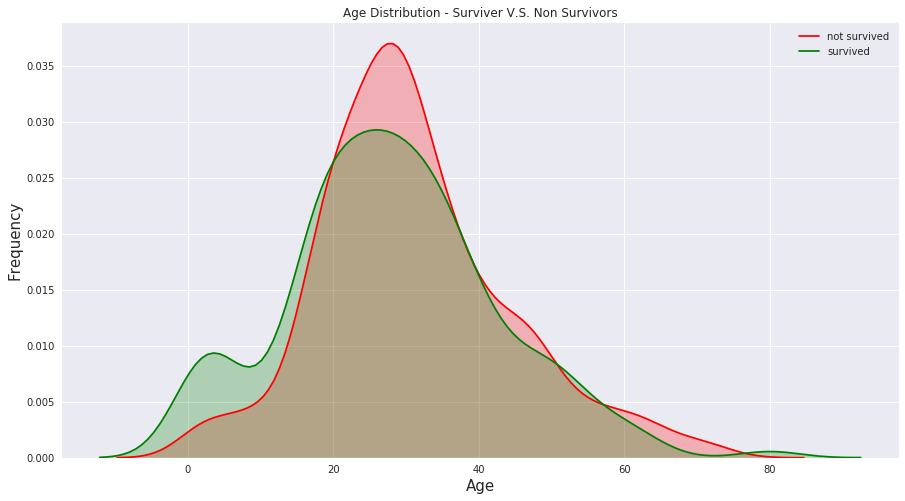

In [27]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors')
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It shows that children and infants were the priority. 


## Modeling the Data
<a name="modelingthedata"></a>
***
I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- K-Nearest Neighbors(KNN)

In [28]:
# separating our independent and dependent variable
X = df.drop(['Survived'], axis=1)
y = df["Survived"]

In [29]:
print (X.head(1))
print (y.head(1))

   Pclass   Age  SibSp  Parch  Fare  Gender  Embarked_Q  Embarked_S
0     3.0  22.0    1.0    0.0  7.25     1.0         0.0         1.0
0    0.0
Name: Survived, dtype: float64


In [30]:
#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

### Splitting the training data
***


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)

### Feature Scaling
***


In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier

### Gaussian Naive Bayes

In [34]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
accy_gaussian = accuracy_score(y_pred, y_test)
print(accy_gaussian)

0.752542372881


### Logistic Regression

In [35]:
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
accy_logreg = accuracy_score(y_pred,y_test)
print (accy_logreg)

0.783050847458


In [37]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))

             precision    recall  f1-score   support

        0.0       0.80      0.84      0.82       174
        1.0       0.75      0.70      0.73       121

avg / total       0.78      0.78      0.78       295

[[146  36]
 [ 28  85]]


### Grid Search on Logistic Regression

In [38]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1)

In [39]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.13, 0.2, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 4.0, 4.5, 5.0, 5.1, 5.5, 6.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [40]:
print (grid.best_params_)
print (grid.best_score_)

{'C': 0.15, 'penalty': 'l1'}
0.807046979866


In [41]:
logreg_grid = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
logreg_grid.fit(x_train,y_train)
y_pred = logreg_grid.predict(x_test)
accuracy_score(y_test, y_pred)

0.77966101694915257

In [42]:
print (classification_report(y_test, y_pred, labels=logreg_grid.classes_))

             precision    recall  f1-score   support

        0.0       0.80      0.83      0.82       174
        1.0       0.75      0.70      0.72       121

avg / total       0.78      0.78      0.78       295



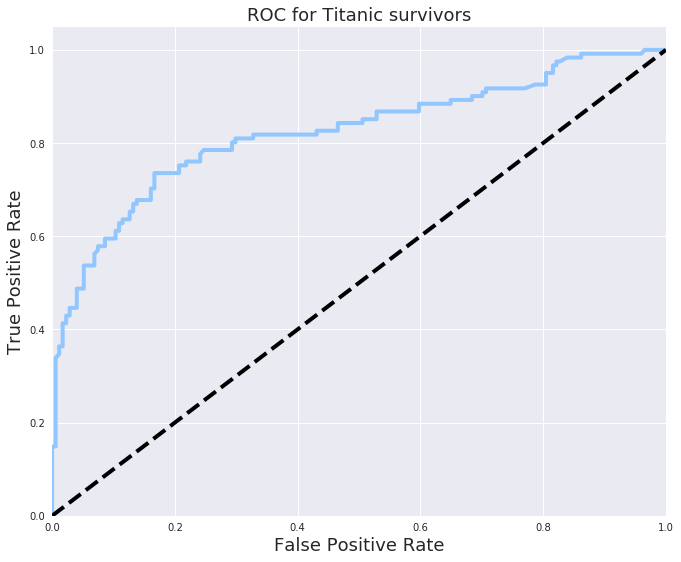

In [43]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-pastel')
y_score = logreg_grid.decision_function(x_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

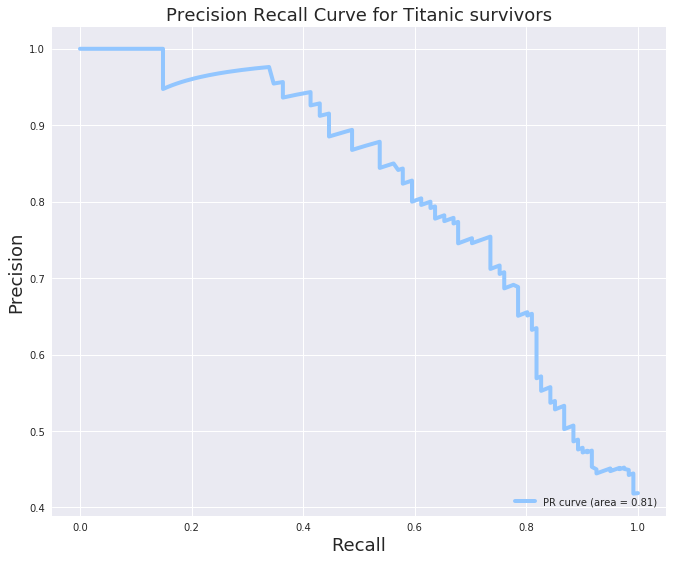

In [44]:
plt.style.use('seaborn-pastel')

y_score = logreg_grid.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## KNN classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.77288135593220342

## Grid search on KNN classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
n_neighbors=range(1,10)
weights=['uniform','distance']
param = {'n_neighbors':n_neighbors, 'weights':weights}
grid2 = GridSearchCV(knn, param,verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
grid2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 10), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [47]:
print (grid2.best_params_)
print (grid2.best_score_)

{'n_neighbors': 6, 'weights': 'uniform'}
0.832214765101


In [48]:
knn_grid = KNeighborsClassifier(
    n_neighbors = grid2.best_params_['n_neighbors'], 
    weights = grid2.best_params_['weights'],
    n_jobs = 1, 
)
knn_grid.fit(x_train,y_train)
y_pred = knn_grid.predict(x_test)
accuracy_score(y_test, y_pred)

0.78983050847457625

## DecisionTree Classifier

In [49]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( max_depth=5, 
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.01)
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
accy_dectree = accuracy_score(y_pred, y_test)
print(accy_dectree)

0.776271186441


### Grid search on Decision Tree

In [50]:
max_depth = range(1,10)
max_feature = [1,2,3,4,5,6,7,8,'auto']
grid3 = {'max_depth':max_depth, 'max_features':max_feature}
decisiontree_grid = GridSearchCV(dectree, grid3, verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
decisiontree_grid.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.01, presort=False,
            random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10), 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [51]:
print( decisiontree_grid.best_params_)
print (decisiontree_grid.best_score_)


{'max_depth': 8, 'max_features': 4}
0.827181208054


### Bagging on Decision Tree

In [52]:
## This section is a part of the working process, please stay tuned

### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
accy_random = accuracy_score(y_pred, y_test)
print (accy_random)

0.8


### Gradient Boosting Classifier

In [54]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)
y_pred = gradient.predict(x_test)
accy_gradient = round(accuracy_score(y_pred, y_test), 3)
print(accy_gradient)

0.793


##### Credits
***
I like to give credits where it belongs. 
I have used Randy Lao's Predicting Employee Kernel as a starting point for this kernel; it's one of the best I have come across. So, Please check it out if you want.

**If you've come this far, congratulations and thank you for reading! **

**If this notebook helped you in anyway please don't forget to upvote! :)**
